<a href="https://colab.research.google.com/github/Brames/Protein-Analysis/blob/main/calculus-1/Lab2_Applications_of_the_Derivative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 2: Applications of the Derivative
==================================

**Name:**

**Due Date:** 

# Instructions

Follow through the Leading Examples section, and then complete the Your Turn section. The plan is to do some investigation of different applications of Newton's Method.

Answer the Follow-Up Questions after each section by typing your answers under each question.

Type your name and due date on the top of this lab.

Submit the file on Canvas through the assignment submission for Lab 2.

# Leading Examples

In these examples, 

We'll need to load `pyplot` from `matplotlib`. Also, we'll use the `numpy` library again.



In [1]:
from matplotlib import pyplot as plt
import numpy as np

## Intersection Points

We know we can find intersection points between two functions using Newton's Method. This will be a nice introduction, where we can build some functions to help run Newton's Method quickly.

We know a little bit about growth rates of function types by now. One of the things we've seen is that exponential functions in general "grow" faster than power functions. This means that, for example, the function $y=e^x$ tends to infinity faster than the function $y=x^3$ tends to infinity.

Let's investigate this a little more!

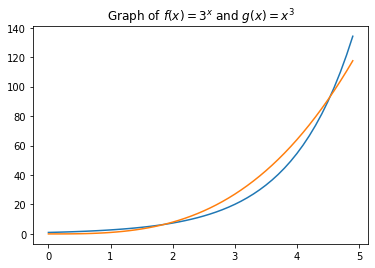

In [2]:
def f(x):
  return np.e**x 

def g(x):
  return x**3

xVals = np.arange(0, 5, 0.1)

plt.plot(xVals, f(xVals))
plt.plot(xVals, g(xVals))
plt.title("Graph of $f(x)=3^x$ and $g(x)=x^3$")
plt.show()

Ok, so maybe there are some intersection points between those two cuves, but it's hard to see. Let's look at a different plot.

If we were going to actually find intersection points by hand, we would set up an equation where $f(x) = g(x)$, and solve.

$$
e^x = x^3 \to e^x - x^3 = 0
$$

Let's look at *this* graphically. We'll graph $y = e^x - x^3$ and see if we can tell where it crosses the $x$-axis (where it is 0).

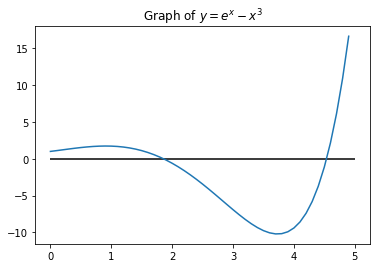

In [3]:
plt.plot(xVals, f(xVals) - g(xVals))
plt.hlines(0, 0, 5) # horizontal line at y=0 from x=0 to x=4 (x-axis)
plt.title("Graph of $y = e^x - x^3$")
plt.show()

We can notice that $e^x - x^3 < 0$ for a short interval of $x$-values somewhere between $x=1$ and $x=5$. That means, then, that $x^3> e^x$ for those $x$-values. It might be interesting and worth while to see where those are! 

Let's find the first $x$-intercept on this curve (the point where $x^3$ becomes larger than $e^x$).

So we'll use Newton's Method for this. I'll do some work defining a function that will "do" Newton's Method for us.

In [5]:
def Newton(CurrentGuess, Func, Deriv):
  diff = 10 # A big initial difference
  iteration = 0 # We haven't started yet
  while diff > 0.0001 and iteration < 100:
    NewGuess = CurrentGuess - Func(CurrentGuess) / Deriv(CurrentGuess) # Newton's Method
    iteration = iteration + 1 # This is a new iteration
    diff = abs(NewGuess - CurrentGuess) # Find the difference between approximations
    CurrentGuess = NewGuess # Our new guess is now the most current one
  # Summary information
  if iteration == 100: exitstatus = "timed out"
  else: exitstatus = "converged"
  Approx = NewGuess
  print("In this example, Newton's Method", exitstatus, "after", iteration, "iterations.")
  print("The approximation is:", Approx)
  return Approx

A quick explanation of what this is doing:

- I'm going to define two different "stopping criteria" here. One of them is the basic "do it for this many iterations." I'm defining it to do 100 iterations at most. But I'm also adding in another thing: if the newest approximation is a repeat of the old one, then we can stop...instead of doing this by rounding my approximations to some decimal place and looking for repeats, I'm just going to look at the difference between the two guesses using `diff`. Once that gets small enough (in this case less than 0.0001), then we can stop.
- The `while` loop is essentially using the two different stopping criteria: as long as the difference is not too small, and as long as we haven't done too many iterations, we'll keep going. So "while these two things are true, do the 4 indented lines of code."
- You'll see that in the 4 lines of code, we:
  - use Newton's Method to find the next approximation
  - add 1 to our iteration counter
  - find the difference between guesses
  - set the new guess to be the current one so that the next round of Newton's Method goes well
- In the summary information, I'm just printing out information on what happened:
  - If we stopped because we "ran out" of iterations, then we'll say that Newton's Method "timed out," since we never saw two guesses that were close enough to each other to stop.
  - If we stopped because we say two guesses close to each other, we'll say that Newton's Method "converged."
  - We obviously want to know the must current approximation!




Let's try this with our function. Note, the function we're using Newton's Method on is $f(x) = e^x - x^3$, since that's the thing we're setting equal to 0. We need an initial guess, and the derivative of $f(x)$.

So $x_0 = 2$ is a fine guess to start with. Then we have $f'(x) = e^x - 3x^2$.

In [6]:
def h(x):
  return np.e**x - x**3

def dhdx(x):
  return np.e**x - 3 * x**2

Newton(2, h, dhdx)

In this example, Newton's Method converged after 3 iterations.
The approximation is: 1.8571838626038921


1.8571838626038921

We'll come back to this example in the "Your Turn" when you find the second a good approximation for the second $x$-value.

## Optimization Problems

Let's say we have some optimization problem that comes down to finding the absolute minimum of $j(x) =x^2 -100x+\cos^2x-\ln(x)$ on the interval $(0,\infty)$. This would be difficult to do by hand! 

We know that in order to do this, we need to find any critical points of the function. So we start with the derivative:

$$
  j'(x) = 2x-100 - 2\sin(x)\cos(x) -\frac{1}{x}
$$

So we see that the only value where $j'(x)$ doesn't exist is when $x=0$, but that's not in the domain of the function, so it's not a critical point.

So that leaves us to solve the equation: 

$$
  j'(x) = 0 \to 2x - 100 - 2\sin x \cos x - \frac{1}{x} = 0
$$

This is where things get difficult, and we'll need to implement Newton's Method.

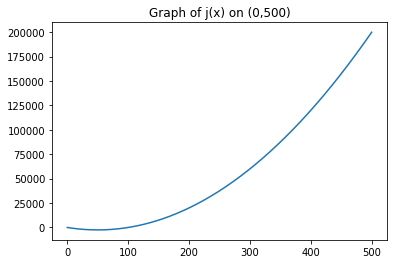

In [7]:
def j(x):
  return x**2 - 100*x + (np.cos(x))**2 - np.log(x)

def djdx(x):
  return 2*x - 100 - 2*np.sin(x)*np.cos(x) - 1/x

xVals = np.arange(0.1, 500, 0.1)
plt.plot(xVals, j(xVals))
plt.title("Graph of j(x) on (0,500)")
plt.show()

Note the error: there's a problem with the log function. Notice the interval of $x$-values we graphed start at $x=0$, but our interval doesn't include 0 because the logarithm function isn't defined there. 

We could tinker around with the $x$-values where graphing at, and use something like `np.arange(0.1,500, 1)` or something like that, but let's leave it for now.

Ok, so there *is* a critical number that we can find there. Let's see if we can find it! 

We'll use Newton's Method to try to approximate solutions of $j'(x) = 0$. For the initial guess, it kind of doesn't matter here: Newton's Method gets messed up when there are lots of changes in curves in the function and things like that, and that's not the case here.

So notice now that since we're doing Newton's Method on $j'(x)$, we'll need the second derivative!

$$
  j''(x) = 2 - 2\cos^2(x) + 2\sin^2(x) - \frac{1}{x^2}
$$

In [8]:
def d2jdx2(x):
  return 2 - 2*(np.cos(x))**2 + 2*(np.sin(x))**2 - 1/x**2

# Newton's Method starting with x=200 as our initial guess
jOptimization = Newton(200, djdx, d2jdx2)

In this example, Newton's Method converged after 9 iterations.
The approximation is: 49.511057806223164


Some more important information:

In [16]:
print("x=", j(jOptimization))
print(djdx(jOptimization))
print(d2jdx2(jOptimization))

x= -2503.1321778596116
7.52785524887889e-10
1.8757772359235063


So what do we have here?

$j'(x) \approx 0$ which is good news, since that's what we were looking for!

We also have $j''(x) >0$, which means that by the Second Derivative Test, we have that this $x$-value is a minimum. We also have the actual value of the minimum, since $j(x) \approx -2503$.

The only next question is to see if this critical point is the only one: if it is, then we know that this local minimum is the absolute minimum! Let's check the graph of $j'(x)$.

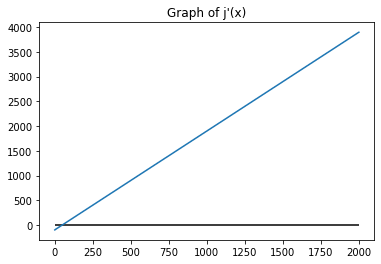

In [ ]:
# I'll start plotting at x=1 instead of x=0, since j'(0) doesn't exist
xVals = np.arange(1,2000, 1) 
plt.plot(xVals, djdx(xVals))
plt.hlines(0, 0, 2000) # draw the x-axis
plt.title("Graph of j'(x)")
plt.show()

This is pretty compelling evidence that there's only one critical point, since it looks like just the one place that $j'(x) = 0$. This means that the local minimum that we found using Newton's Method is an absolute minimum.

# Your Turn

Let's do some more!

We'll be working with the same two libraries that we have been all semester. Run the next block of code, and also remember that you'll need to run this little chunk of code every time you open the lab.

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt

Now we'll take a look at some more examples. Let's first return to our initial example with the intersection points.

## Revisiting Intersection Points

Let's go back to the first example we looked at with the intersection points between $y=e^x$ and $y=x^3$.

Use Newton's Method to find the second intersection point.

In [17]:
# Use this chunk of code to find the second intersection point.


### Follow-Up Questions

*Include your answer underneath each question.*

------

*1. What does this $x$-value* represent in terms of the relationship between $e^x$ and $x^3$? Feel free to link this back to growth rates of functions, since this is how we introduced this whole idea.*


-------

## More Absolute Extrema

You're going to find any absolute extrema for the function $y = 5\sin(x-2)e^{-(x-2)^2}-x$ on the interval $[0,2]$. In order to find critical points, you're going to need to solve $y'=0$, and this is where you'll use Newton's Method.

(Notice that the derivatives $y'$ and $y''$ might be annoying to find: feel free to confirm your derivatives with others!)

In [ ]:
# Use this chunk of code to define the derivatives you'll need.


We might recall that it could be nice to have a general idea of what this function looks like on this interval. Let's graph the function on the interval $[0,2]$.

In [ ]:
# Use this chunk of code to graph the function on [0,2].


We might have a better idea on how to find these absolute extrema. Make note, though, that we should *show* that the $x$-values we find for the absolute extrema actually match with the absolute maximum/minimum $y$-value.

In [ ]:
# Use this chunk of code to find the absolute extrema.


### Follow-Up Questions

*Include your answer underneath each question.*

------

*2. Report the absolute extrema you found. Give the approximate $x$ and $y$-value(s). Justify your answers.* 

-------

## Investigating the Initial Guess

Let's investigate the following function: $y = x^3-2x+2$. We're going to try to find the $x$-intercept. Try using Newton's Method a couple of times with the following initial guesses: 0, 1, a value between 0 and 1, and a value bigger than 1.

In [ ]:
# Use this chunk of code to define y, the derivative, 
# and then do the four different Newton's Method.


### Follow-Up Questions

*Include your answer underneath each question.*

------

*3. Explain what happened for each initial guess. What do you think the actual $x$-intercept is? Why?* 

-------

## More Fun With Initial Guesses

Here's a fun one. Let's consider the function 

$$ 
  y=-288 + 2880 x - 11314 x^2 + 21785 x^3 - 20523 x^4 + 7560 x^5
$$

This function has 5 real $x$-intercepts. We could do some algebra and stuff and find all 5 of these, but let's use Newton's Method.

The hint I'll give is that the $x$-intercepts are all between $x=0$ and $x=4$. Use Newton's method with different starting points to try to find all of the $x$-intercepts. 


In [ ]:
# Use this chunk of code to define the function and the derivative.


In [ ]:
# Use this chunk of code to do Newton's method with different starting points.
# Show all of your attempts.


Are you frustrated yet? You've likely found that this is annoying or hard to do. Let's go back a step and try plotting the function on the interval $[0,4]$ in order to get some visual context. This might help us find the remaining $x$-intercepts using Newton's Method.

In [ ]:
# Use this chunk of code to graph the function on the interval [0,4].

Finish up by finding whatever $x$-intercepts you hadn't found yet.

In [ ]:
# Use this chunk of code to continue doing Newton's method with different starting points.
# Show all of your attempts.


### Follow-Up Questions

*Include your answer underneath each question.*

------

*4. List the $x$-intercepts you found.*

*5. How many attempts did it take for you to find all 5 $x$-intercepts? Why do you think it took that many attempts?*

-------